In [1]:
"""
Here is the analysis and plots of the comparision between TRACEvar to the other genetic methods (Fig 2. E-F).
The comparision running code is ducumented in the Compare_TRACEvar_to_Common_Scores.ipynb script. 
The code for the Spearman correlation between the auPRC of TRACEvar tissue models and the number of pathogenic variants per tissue (Fig. S5) 
is also documented here.
"""

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

performance_directory = os.listdir(os.path.join('..', '..', 'Results', 'Slim Model Comparison3'))
files = [f for f in performance_directory if '.csv' in f]
all_tissues_dfs = []
for file in files:
    print(file)
    tissue = file.replace('_Compare_Scores_Slim_Model_Docker.csv', '')
    path = os.path.join('..', '..', 'Results', 'Slim Model Comparison2', file)
    AUC_Results = pd.read_csv(path)
    trace_results = {'Tissue': tissue, 'Data_set': 'Full TRACE', 'Fold': 'All', 'ROC_AUC': AUC_Results['ROC_AUC'][(AUC_Results['Tissue'] == tissue) & (AUC_Results['Data_set'] == 'Full TRACE')].mean(), 'PR_AUC': AUC_Results['PR_AUC'][(AUC_Results['Tissue'] == tissue) & (AUC_Results['Data_set'] == 'Full TRACE')].mean()}
    Trace_Mean = pd.DataFrame.from_dict(trace_results, orient='index')
    Tissue_df = pd.concat([AUC_Results[(AUC_Results['Tissue'] == tissue) & (AUC_Results['Fold'] == 'All')], Trace_Mean.T])
    all_tissues_dfs.append(Tissue_df)

    Tissue_df['Order'] = 1
    Tissue_df.loc[Tissue_df['Data_set'] == 'PolyPhen', 'Order'] = 0
    Tissue_df.loc[Tissue_df['Data_set'] == 'CADD', 'Order'] = 2
    Tissue_df.loc[Tissue_df['Data_set'] == 'CAPICE', 'Order'] = 3
    Tissue_df.loc[Tissue_df['Data_set'] == 'Full TRACE', 'Order'] = 4
    Tissue_df.sort_values(by = ['Order'], inplace=True)
    

Artery - Aorta_Compare_Scores_Slim_Model_Docker.csv
kidney_Compare_Scores_Slim_Model_Docker.csv
Pituitary_Compare_Scores_Slim_Model_Docker.csv
brain-0_Compare_Scores_Slim_Model_Docker.csv
brain-2_Compare_Scores_Slim_Model_Docker.csv
Testis_Compare_Scores_Slim_Model_Docker.csv
brain-3_Compare_Scores_Slim_Model_Docker.csv
Muscle - Skeletal_Compare_Scores_Slim_Model_Docker.csv
Liver_Compare_Scores_Slim_Model_Docker.csv
brain_Compare_Scores_Slim_Model_Docker.csv
Heart - Left Ventricle_Compare_Scores_Slim_Model_Docker.csv
Skin - Not Sun Exposed_Compare_Scores_Slim_Model_Docker.csv
Lung_Compare_Scores_Slim_Model_Docker.csv
Ovary_Compare_Scores_Slim_Model_Docker.csv
Nerve - Tibial_Compare_Scores_Slim_Model_Docker.csv
brain-1_Compare_Scores_Slim_Model_Docker.csv
Whole Blood_Compare_Scores_Slim_Model_Docker.csv




            Tissue  Data_set Fold     auROC      auPRC  Order
5   Artery - Aorta  PolyPhen  All  0.843743  0.0303944      0
4   Artery - Aorta      SIFT  All  0.818152  0.0166799      1
2   Artery - Aorta      CADD  All  0.892239  0.0394874      2
3   Artery - Aorta    CAPICE  All  0.897569  0.0410226      3
0   Artery - Aorta  TRACEvar  All  0.803827   0.457045      4
..             ...       ...  ...       ...        ...    ...
12     Whole Blood  PolyPhen  All   0.80251  0.0363057      0
11     Whole Blood      SIFT  All  0.765541  0.0217476      1
9      Whole Blood      CADD  All   0.87423  0.0309373      2
10     Whole Blood    CAPICE  All  0.845141  0.0264109      3
0      Whole Blood  TRACEvar  All  0.990991   0.580703      4

[85 rows x 6 columns]
auROC mean 0.9488585859191813
auROC median 0.9686098375444145
auPRC mean 0.5160134648066116
auPRC median 0.5807031379113065


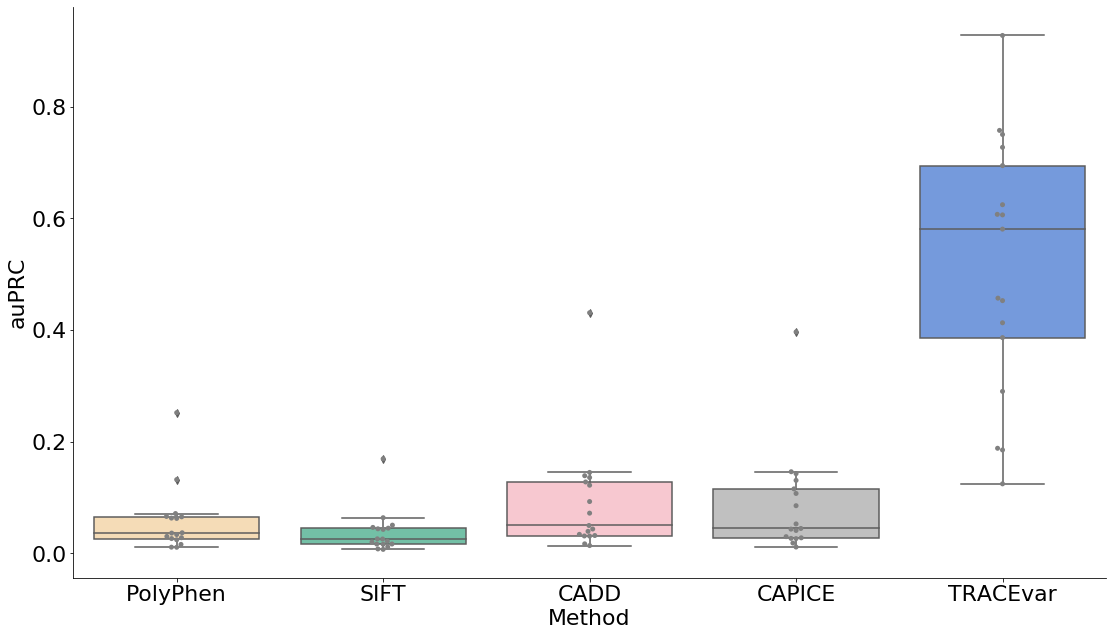

In [3]:

print('\n')
All_Results = pd.concat(all_tissues_dfs)
All_Results.rename(columns={'ROC_AUC':'auROC', 'PR_AUC':'auPRC'}, inplace=True)
All_Results.loc[All_Results['Data_set'] == 'Full TRACE', 'Data_set'] = 'TRACEvar'
print(All_Results)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 22})

sns.boxplot(x="Data_set", y="auPRC", data=All_Results, palette=['navajowhite', 'mediumaquamarine',  'pink', 'silver', 'cornflowerblue']) #ROC_AUC, PR_AUC,
sns.swarmplot(x="Data_set", y="auPRC", data=All_Results, color='gray')

plt.xlabel('Method')
print('auROC mean', All_Results['auROC'][All_Results['Data_set'] == 'TRACEvar'].mean())
print('auROC median',All_Results['auROC'][All_Results['Data_set'] == 'TRACEvar'].median())

print('auPRC mean',All_Results['auPRC'][All_Results['Data_set'] == 'TRACEvar'].mean())
print('auPRC median',All_Results['auPRC'][All_Results['Data_set'] == 'TRACEvar'].median())

file_name = 'Comparison_Scores_Plot_auPRC.pdf'

path = os.path.join('..', '..', 'Results', 'Comparison Analysis Slim2', file_name)
plt.savefig(path)
plt.show()
plt.close()



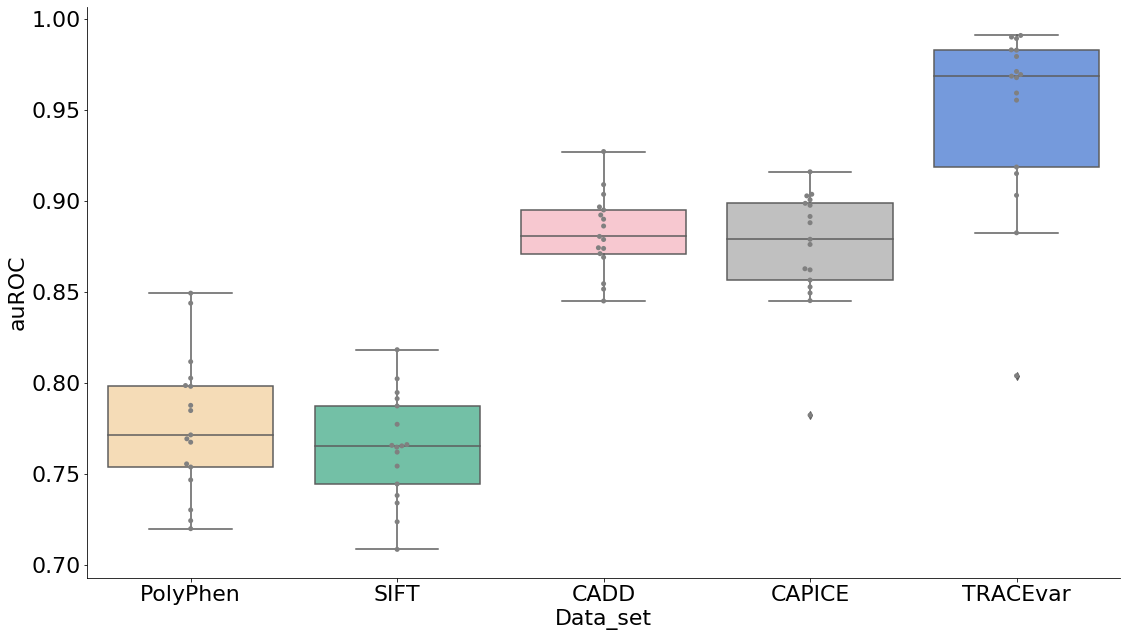

In [4]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

sns.boxplot(x="Data_set", y="auROC", data=All_Results, palette=['navajowhite', 'mediumaquamarine',  'pink', 'silver', 'cornflowerblue']) #ROC_AUC, PR_AUC,
sns.swarmplot(x="Data_set", y="auROC", data=All_Results, color='gray')

file_name = 'Comparison_Scores_Plot_auROC.pdf'

path = os.path.join('..', '..', 'Results', 'Comparison Analysis Slim2', file_name)
plt.savefig(path)
plt.show()
plt.close()

In [5]:

for method in All_Results['Data_set'].unique():
    print('@', method)
    print('auROC mean', All_Results['auROC'][All_Results['Data_set'] == method].mean())
    print('auROC median',All_Results['auROC'][All_Results['Data_set'] == method].median())

    print('auPRC mean',All_Results['auPRC'][All_Results['Data_set'] == method].mean())
    print('auPRC median',All_Results['auPRC'][All_Results['Data_set'] == method].median())

@ PolyPhen
auROC mean 0.7772280130188532
auROC median 0.7712875680295862
auPRC mean 0.05687869802880394
auPRC median 0.036305656576355726
@ SIFT
auROC mean 0.7644584840965014
auROC median 0.7652658401777173
auPRC mean 0.037206587328678535
auPRC median 0.02570355730386793
@ CADD
auROC mean 0.8822251924193713
auROC median 0.880457349265077
auPRC mean 0.09162881359293915
auPRC median 0.049930543382873005
@ CAPICE
auROC mean 0.8743602434960995
auROC median 0.8788916922476719
auPRC mean 0.08513039827105452
auPRC median 0.044639891192306665
@ TRACEvar
auROC mean 0.9488585859191813
auROC median 0.9686098375444145
auPRC mean 0.5160134648066116
auPRC median 0.5807031379113065


In [6]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

measure = 'auROC'
trace_values = All_Results[measure][All_Results['Data_set'] == 'TRACEvar'].tolist()
methods = [x for x in All_Results['Data_set'].unique() if x != 'TRACEvar']
print(methods)
p_value_list = []
for method in methods:
    print('@', method)
    m_values = All_Results[measure][All_Results['Data_set'] == method].tolist()
    w, p = wilcoxon(trace_values, m_values, alternative='greater')
    print(p)
    p_value_list.append(p)

print(p_value_list)
bh_correction = multipletests(p_value_list, method='fdr_bh')
print(bh_correction[1])
print('Adjusted p:', bh_correction[1].max())

['PolyPhen', 'SIFT', 'CADD', 'CAPICE']
@ PolyPhen
0.0001757662842537316
@ SIFT
0.0001757662842537316
@ CADD
0.000822003164912987
@ CAPICE
0.000822003164912987
[0.0001757662842537316, 0.0001757662842537316, 0.000822003164912987, 0.000822003164912987]
[0.00035153 0.00035153 0.000822   0.000822  ]
Adjusted p: 0.000822003164912987


In [7]:
measure = 'auPRC'
trace_values = All_Results[measure][All_Results['Data_set'] == 'TRACEvar'].tolist()
methods = [x for x in All_Results['Data_set'].unique() if x != 'TRACEvar']
print(methods)
p_value_list = []
for method in methods:
    print('@', method)
    m_values = All_Results[measure][All_Results['Data_set'] == method].tolist()
    w, p = wilcoxon(trace_values, m_values, alternative='greater')
    print(p)
    p_value_list.append(p)

print(p_value_list)
bh_correction = multipletests(p_value_list, method='fdr_bh')
print(bh_correction[1])
print('Adjusted p:', bh_correction[1].max())

['PolyPhen', 'SIFT', 'CADD', 'CAPICE']
@ PolyPhen
0.00014652626009624466
@ SIFT
0.00014652626009624466
@ CADD
0.00014652626009624466
@ CAPICE
0.00014652626009624466
[0.00014652626009624466, 0.00014652626009624466, 0.00014652626009624466, 0.00014652626009624466]
[0.00014653 0.00014653 0.00014653 0.00014653]
Adjusted p: 0.00014652626009624466


In [8]:
path = os.path.join('..', '..', 'Output', 'Genes_and_Variants_per_Tissue_hg37_New.csv')
Statistics = pd.read_csv(path)

Statistics['Num_Variants'] = Statistics['Pathogenic_Variants'] + Statistics['Benign_Variants']
Statistics['Pathogenic_Variants_Rate'] = Statistics['Pathogenic_Variants'] / Statistics['Num_Variants']

TRACE_var_rates = pd.merge(All_Results[All_Results['Data_set'] == 'TRACEvar'], Statistics, on='Tissue', how='left')
print(TRACE_var_rates)




                    Tissue  Data_set Fold     auROC     auPRC  Order  \
0           Artery - Aorta  TRACEvar  All  0.803827  0.457045      4   
1                   kidney  TRACEvar  All  0.955409  0.624408      4   
2                Pituitary  TRACEvar  All  0.882441  0.386401      4   
3                  brain-0  TRACEvar  All   0.96861  0.606162      4   
4                  brain-2  TRACEvar  All   0.91863  0.124507      4   
5                   Testis  TRACEvar  All   0.97118  0.452641      4   
6                  brain-3  TRACEvar  All  0.915026   0.18518      4   
7        Muscle - Skeletal  TRACEvar  All  0.979433  0.694423      4   
8                    Liver  TRACEvar  All  0.967783  0.290127      4   
9                    brain  TRACEvar  All  0.989303  0.927505      4   
10  Heart - Left Ventricle  TRACEvar  All  0.969489  0.750129      4   
11  Skin - Not Sun Exposed  TRACEvar  All   0.98292  0.607157      4   
12                    Lung  TRACEvar  All  0.983055  0.727162   

correlation 0.7056967595528576


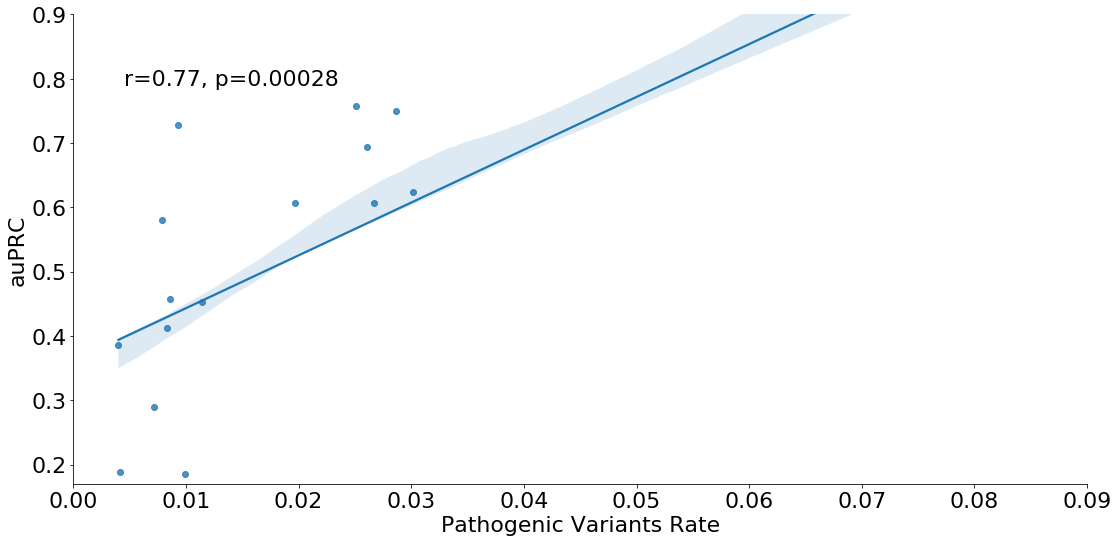

In [9]:

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (16,8)

TRACE_var_rates["Pathogenic_Variants_Rate"] = TRACE_var_rates["Pathogenic_Variants_Rate"].astype(float)
TRACE_var_rates["auPRC"] = TRACE_var_rates["auPRC"].astype(float)

correlation = TRACE_var_rates['Pathogenic_Variants_Rate'].corr(TRACE_var_rates['auPRC'])
print('correlation', correlation)
plt.rcParams.update({'font.size': 22})

sns.regplot(data=TRACE_var_rates, x="Pathogenic_Variants_Rate", y="auPRC", ci=30)
plt.xlim(0, 0.09, 0.01)
plt.ylim(0.17, 0.9, 0.05)
# plt.ylabel('auPRC')
plt.xlabel('Pathogenic Variants Rate')
# r, p = stats.pearsonr(TRACE_var_rates['Pathogenic_Variants_Rate'],TRACE_var_rates['PR_AUC'])
r, p = stats.spearmanr(TRACE_var_rates['Pathogenic_Variants_Rate'],TRACE_var_rates['auPRC'])


ax = plt.gca()
ax.text(.05, .85, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes)
plt.tight_layout()

path = os.path.join('..', '..', 'Results', 'Comparison Analysis Slim2', 'Performance_Frequency_correlation_Spearman.pdf')
plt.savefig(path)